<h1>The Validation Set Approach</h1>

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [37]:
|auto = pd.read_csv('Auto.csv')
auto.insert(0,"intercept",1)
auto.columns

Index(['intercept', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [38]:
auto_train,auto_valid = train_test_split(auto,test_size=196,random_state=0)

In [41]:
x_train=auto_train[["intercept","horsepower"]]
y_train=auto_train["mpg"]
sm=sm.OLS(y_train,x_train)
results=sm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     300.4
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           2.83e-41
Time:                        22:23:00   Log-Likelihood:                -590.83
No. Observations:                 196   AIC:                             1186.
Df Residuals:                     194   BIC:                             1192.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9055      1.009     39.537      0.000      37.915      41.896
horsepower    -0.1563      0.009    -17.333      0.000      -0.174      -0.139
==============================================================================
Omnibus:                        7.263   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.993
Skew:                           0.440   Prob(JB):                       0.0303
Kurtosis:                       3.286   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
x_valid=auto_valid[["intercept","horsepower"]]
y_valid=auto_valid["mpg"]
valid_pred = results.predict(x_valid)
np.mean((valid_pred-y_valid)**2)

23.61661706966988

In [130]:
def evalMSE(data, poly,rand=0):
    for i in range(1, poly + 1):
        data[f"horsepower^{i}"] = data["horsepower"] ** i

    data_train, data_valid = train_test_split(data, test_size=196, random_state=rand)

    f_train = data_train.drop("mpg", axis=1)
    h_train = data_train["mpg"]
    f_valid = data_valid.drop("mpg", axis=1)
    h_valid = data_valid["mpg"]

    # Fit the OLS model
    model = sm.OLS(h_train, f_train).fit()

    # Predict on validation set
    fvalid_pred = model.predict(f_valid)

    # Calculate mean squared error
    mse = np.mean((fvalid_pred - h_valid) ** 2)
    return mse

In [131]:
l=auto[["intercept","horsepower","mpg"]]
evalMSE(l.copy(),2)

18.76303134689772

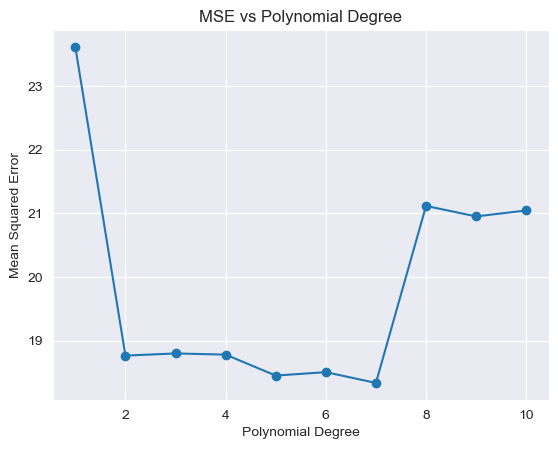

In [132]:
poly=10
MSE = np.zeros(poly)
for idx, degree in enumerate(range(1, poly+1)):
    MSE[idx] = evalMSE(l.copy(),degree)
plt.plot(np.arange(1,poly+1), MSE, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree')
plt.grid(True)

    <h1>Cross-Validation</h1>

In [122]:
x=auto["horsepower"].values.reshape(-1,1)
y=auto["mpg"]
lm=LinearRegression()
cv_error= cross_validate(lm,x,y,cv=5)
print(cv_error.keys())
print(np.mean(cv_error['test_score']))

dict_keys(['fit_time', 'score_time', 'test_score'])
0.13540761510225147


In [127]:
def evalCV(data, poly,cv):
    for i in range(1, poly + 1):
        data[f"horsepower^{i}"] = data["horsepower"] ** i
    X = data.drop("mpg", axis=1)
    Y = data["mpg"]
    cv_error = cross_validate(LinearRegression(),X,Y,cv=cv)
    return np.mean(cv_error['test_score'])

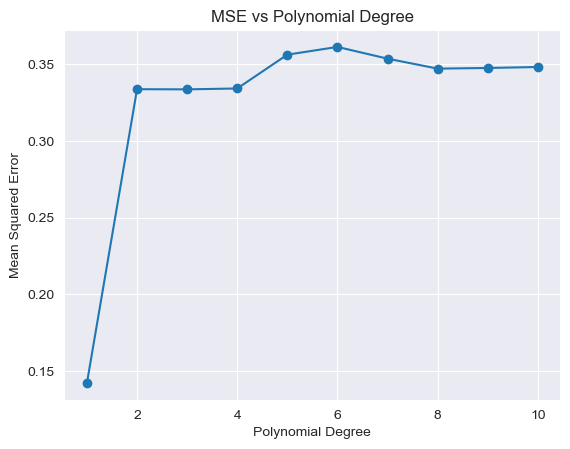

In [129]:
poly=10
cv=5
CV = np.zeros(poly)
for idx, degree in enumerate(range(1, poly+1)):
    CV[idx] = evalCV(l.copy(),degree,cv)
plt.plot(np.arange(1,poly+1), CV, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree')
plt.grid(True)